# Evaluation with Imaris object-object stats of object overlap

In [1]:
from __future__ import print_function, unicode_literals, absolute_import, division
import sys
import numpy as np
import pandas as pd
from numpy import int16
from pathlib import Path
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from napari_segmentation_overlap_filter.functions import create_overlap_df, overlapping_objects, return_overlap_segmentation, return_non_zero_pixels_from_Image, get_object_sizes, timer_func

from glob import glob
from tqdm import tqdm
from tifffile import imread

from skimage.segmentation import clear_border

import seaborn as sns
from collections import Counter
from timeit import default_timer as time

np.random.seed(42)

Hi Todd


In [24]:
# Finding relevant files
root_dir = Path('/nemo/stp/lm/working/shared/vd_tf/Training_Data/Imaris_Statistics')
folder_pattern = '*_Statistics'
file_pattern = '*_Detailed.csv'

In [25]:
# Find folders
folders = sorted([item for item in root_dir.glob(folder_pattern)])
folders

[PosixPath('/nemo/stp/lm/working/shared/vd_tf/Training_Data/Imaris_Statistics/C3-JTGX25-3b_81-130C_Statistics'),
 PosixPath('/nemo/stp/lm/working/shared/vd_tf/Training_Data/Imaris_Statistics/C3-JTGX74-1e_201-250C_Statistics'),
 PosixPath('/nemo/stp/lm/working/shared/vd_tf/Training_Data/Imaris_Statistics/C3-JTGX76-1m_25-74C_Statistics'),
 PosixPath('/nemo/stp/lm/working/shared/vd_tf/Training_Data/Imaris_Statistics/C3-JTGX76-2e_147-196_Statistics'),
 PosixPath('/nemo/stp/lm/working/shared/vd_tf/Training_Data/Imaris_Statistics/C3-JTGX78-2h_221-270_1_Statistics'),
 PosixPath('/nemo/stp/lm/working/shared/vd_tf/Training_Data/Imaris_Statistics/C3-JTHT1-2k_80-129_Statistics'),
 PosixPath('/nemo/stp/lm/working/shared/vd_tf/Training_Data/Imaris_Statistics/C3-JTHT3-1h_281-330_Statistics'),
 PosixPath('/nemo/stp/lm/working/shared/vd_tf/Training_Data/Imaris_Statistics/C3-JTHT3-2b_170-219_Statistics'),
 PosixPath('/nemo/stp/lm/working/shared/vd_tf/Training_Data/Imaris_Statistics/C3-JTHT3-3g_254-303_

In [28]:
combined_df = pd.DataFrame()

for i in np.arange(len(folders)):
    folder = folders[i]
    
    csv_file = [item for item in folder.glob(file_pattern)]
    pd_df = pd.read_csv(csv_file[0], skiprows=3)
    
    # Remove column with NaN units
    pd_df = pd_df.drop(pd_df.columns[[1]], axis=1)
    
    pd_df = pd_df.rename(columns={'Overlapped Volume Ratio to Surfaces': 'Overlap Percent'})
    
    # Set ID
    pd_df = pd_df.set_index('ID')
    
    # Source column
    pd_df['Image'] = i+1
    
    # add to big dataframe of all images
    combined_df = pd.concat([combined_df, pd_df], ignore_index=True)
    

/tmp/slurm_4308906/ipykernel_126625/2625032549.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=combined_df, y="Overlap Percent", x="Image", legend=False, palette='Set2')


<Axes: xlabel='Image', ylabel='Overlap Percent'>

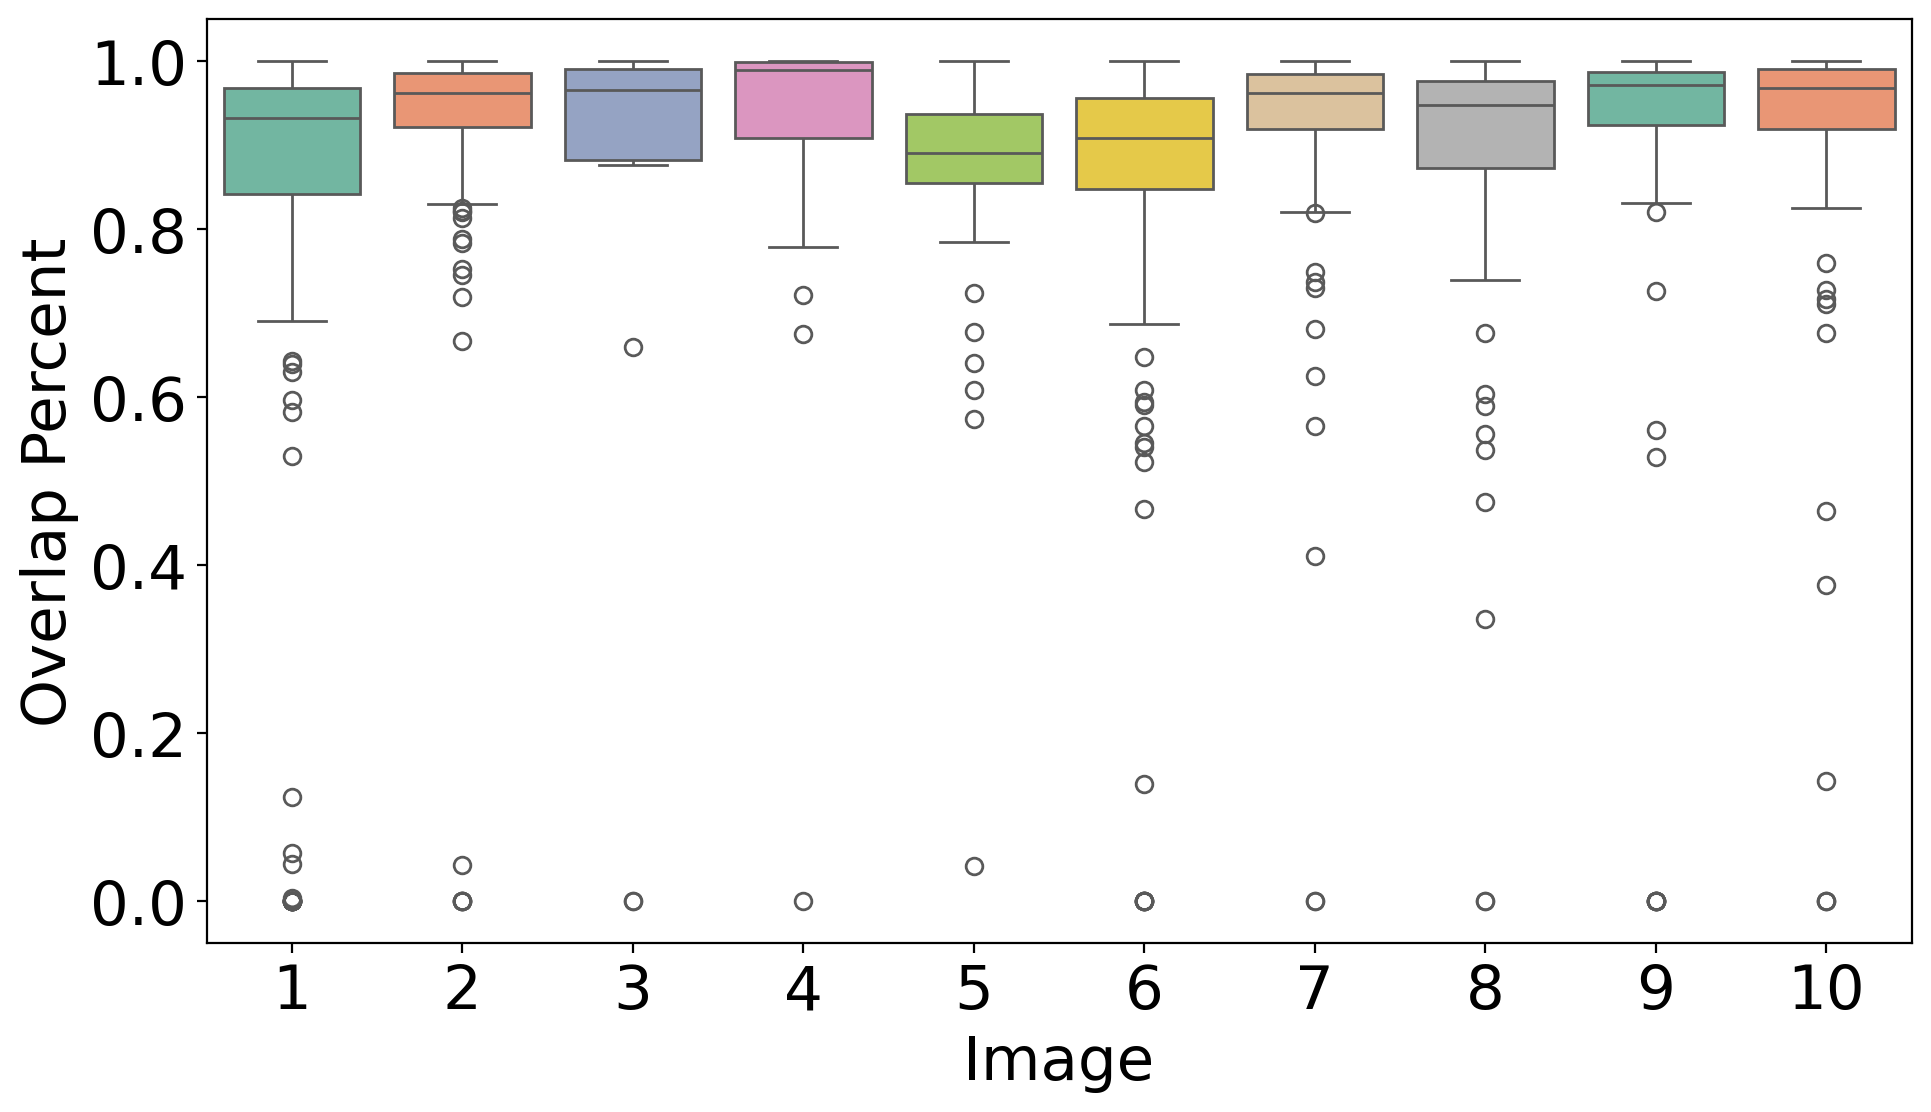

In [30]:
# # Create a custom style
# plt.style.use('dark_background')
# sns.set_style("whitegrid")

# # Customize the rcParams for a transparent or black background with white text
# plt.rcParams.update({
#     'axes.facecolor': 'none',     # Background color of the plot area
#     'figure.facecolor': 'none',   # Background color around the plot
#     'axes.edgecolor': 'white',     # Color of the axes lines
#     'axes.labelcolor': 'white',    # Color of the axes labels
#     'xtick.color': 'white',        # Color of the x-tick labels
#     'ytick.color': 'white',        # Color of the y-tick labels
#     'text.color': 'white',         # Color of the text
#     'grid.color': 'gray',          # Color of the grid lines
# })

plt.style.use('default')

plt.rcParams.update({'font.size': 22})

sns.set_palette("pastel")

fig, ax = plt.subplots(figsize=(11, 6))

sns.boxplot(data=combined_df, y="Overlap Percent", x="Image", legend=False, palette='Set2')